In [1]:
from mutual_information import *
%load_ext autoreload
%autoreload 2

In [2]:
pd.options.display.max_columns = 100

# let's load some data

In this case, the dataset is a survey on Syrian refugees living in camps in Jordan and Lebanon. You can read the report (on the Jordan subset of the data) [here](https://reliefweb.int/report/jordan/removing-barriers-path-towards-inclusive-access-disability-assessment-among-syrian)

For now, we are going to analyze the correlations between the variables (questions) measured in the survey only for adults.

In [3]:
data = pd.read_csv('./Data/data_adult.csv')

# what does the data look like? 

Lets look at the first few rows in the data.

In [4]:
data.head(3)

,#loc_country,#loc_camp,"#access+shelter_Does your family have a shelter or house with electricity, easy to move around, in a location where you feel safe? Answer below questions by Yes or NoIf no, what is your concern?",#access+shelter_Yes I have shelter/house but no stable electricity,#access+shelter_Yes I have shelter/house but not easy to move around for one or some of family members,#access+shelter_yes I have shelter /house but fear of attack or harassment around my place,#access+shelter_Yes I have shelter/house but fear of fear to getting harm or injuries around my place,"#barriers+shelter_If no, what is your concern?","#access+medical_If there was a medical need, were you or any of your family members able to access medical services at hospitals/clinics in the last six months? If no, why?",#access+medical_Did you access to medical services when needed?,"#barriers+medical_I do not know where the service or support is available, or, who can help?",#barriers+medical_I got some information but could not read or understand?,"#barriers+medical_I do not have documents to access services (Specify types of documents: eg UNHCR card, visa, ID)?","#barriers+medical_Safety fears for movement outside home (attack, harassment,..)?","#barriers+medical_Safety fears for movement outside home (harm, injuries arrested..)?",#barriers+medical_Services are not available?,#barriers+medical_Services are too expensive ?,#barriers+medical_Services are far away and transportation is not available?,#barriers+medical_Services are far away and transportation is too expensive?,#barriers+medical_Services are far away and transportation is not accessible?,#barriers+medical_Services are delivered in places that are not accessible?,#barriers+medical_Services are delivered in places that are not gender sensitive (not comfortable for women or men)?,#barriers+medical_Staff are not supportive and/or do not know how to communicate with me/my family?,#barriers+medical_Services are not meeting my/my family’s specific needs?,#barriers+medical_Others (specify)?,#barriers+medical_Others (specify),"#barriers+medical_Among those mentioned as reasons, what will be the most important issue which, if solved, will help you access services? Select one please","#access+water_Does your family have enough safe water from reliable sources for drinking, cooking, cleaning and personal hygiene?","#barriers+water_I do not know where the service or support is available, or, who can help?6",#barriers+water_I got some information but could not read or understand?7,"#barriers+water_I do not have documents to access services (Specify types of documents: (eg UNHCR card, visa, ID)?","#barriers+water_Safety fears for movement outside home (attack, harassment, arrested)?","#barriers+water_Safety fears for movement outside home (harm, injuries)?",#barriers+water_Services are not available?8,#barriers+water_Services are too expensive ?9,#barriers+water_Services are far away and transportation is not available?10,#barriers+water_Services are far away and transportation is too expensive?11,#barriers+water_Services are far away and transportation is not accessible?12,#barriers+water_Services are delivered in places that are not accessible?13,#barriers+water_Services are delivered in places that are not gender sensitive (not comfortable for women or men)?14,#barriers+water_Staff are not supportive and/or do not know how to communicate with me/my family?15,#barriers+water_Services are not meeting my/my family’s specific needs?16,#barriers+water_Others (specify)?17,#barriers+water_Others (specify)18,"#barriers+water_Among those mentioned as reasons, what will be the most important issue which, if solved, will help you access services? Select one please20",#barriers+latrine_Is it clean?,#access+latrine_Is it accessible for one or some of family members?,#barriers+latrine_Is it available all the time to use freely?,"#barriers+latrine_Fear of attack, harassment?",#barriers+latrine_fear of harm or in

You may notice that the column names start with a hashtag e.g. "#access+shelter_Yes I have shelter/house but no stable electricity". This hash tag will help us categorize the variables into useful categories (e.g. #access+shelter tags are questions about access to shelter) and help visualize them in a network.

The data contains missing values (NaN), and the answers to the questions have been recoded to numerical values

# Correlations : let's compute Mutual Information! 

To analyze correlations between variables, we'll use a very useful measure of statistical dependence between variables called [Mutual Information](https://en.wikipedia.org/wiki/Mutual_information#cite_note-magerman-19)

This measure has its origins in the work of [Claude Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) and is has deep relationships with both basic science (statistical physics) and data science and machine learning.

We're going to use a normalized version of Mutual Information here (called [Information Quality Ratio](https://www.sciencedirect.com/science/article/abs/pii/S0169743916304907?via%3Dihub)). This means the mutual information values will lie between 0.0 and 1.0.

In [7]:
# OPTIONS AVAILABLE : 
# MI_type specifies the exact mutual information measure to use
# na_remove : removes all rows from the data where there are missing values in the pair of variables being compared
# na_thresh : how many non-missing value rows in the pair of variables are needed ?
# MI_thresh : the mutual information needs to be at least this much to appear in the graph

mi_graph = MIGraphBuilder(MI_type = 'IQR', na_remove = True, na_thresh = 200, MI_thresh = 0.008)

# plot the network

We'll only look at sub-graph where we look at relationships between [Washington Group Questions](http://www.washingtongroup-disability.com/) and access (and barriers to access) to cash assistance. We'll also include variables about personal information (age, gender, employment etc.) and an indicator of disability that is derived from the Washington Group Questions (WGQ). The WGQs are widely used to assess the difficulties people have in performing everyday basic activities such as reading, hearing, walking, taking care of themselves, remembering things etc.  

In [8]:
# lets first compute the Mutual Information
E, _ = mi_graph.compute_graph(data, return_all=True)

 ..... MI graph computed in 13.03 secs ...... 


In [9]:
# now lets sub-select a part of the graph
E = mi_graph.select_nodes(select_group = ['#wgq', '#barriers+food', '#access+food', '#disability', '#barriers+cash', '#access+cash', '#personal'], only_these=True)

How many nodes are there in this sub-graph ? 

In [10]:
len(E.keys())

1542

To plot this, we need to use the excellent python library [networkX](https://networkx.github.io/documentation/stable/index.html) 

In [11]:
Gr, pos, weights = mi_graph.setup_nx_graph(E)

 ..... NX graph computed in 0.03 secs ...... 


now lets draw it !

 ..... NX graph plotted in 2.10 secs ..... 


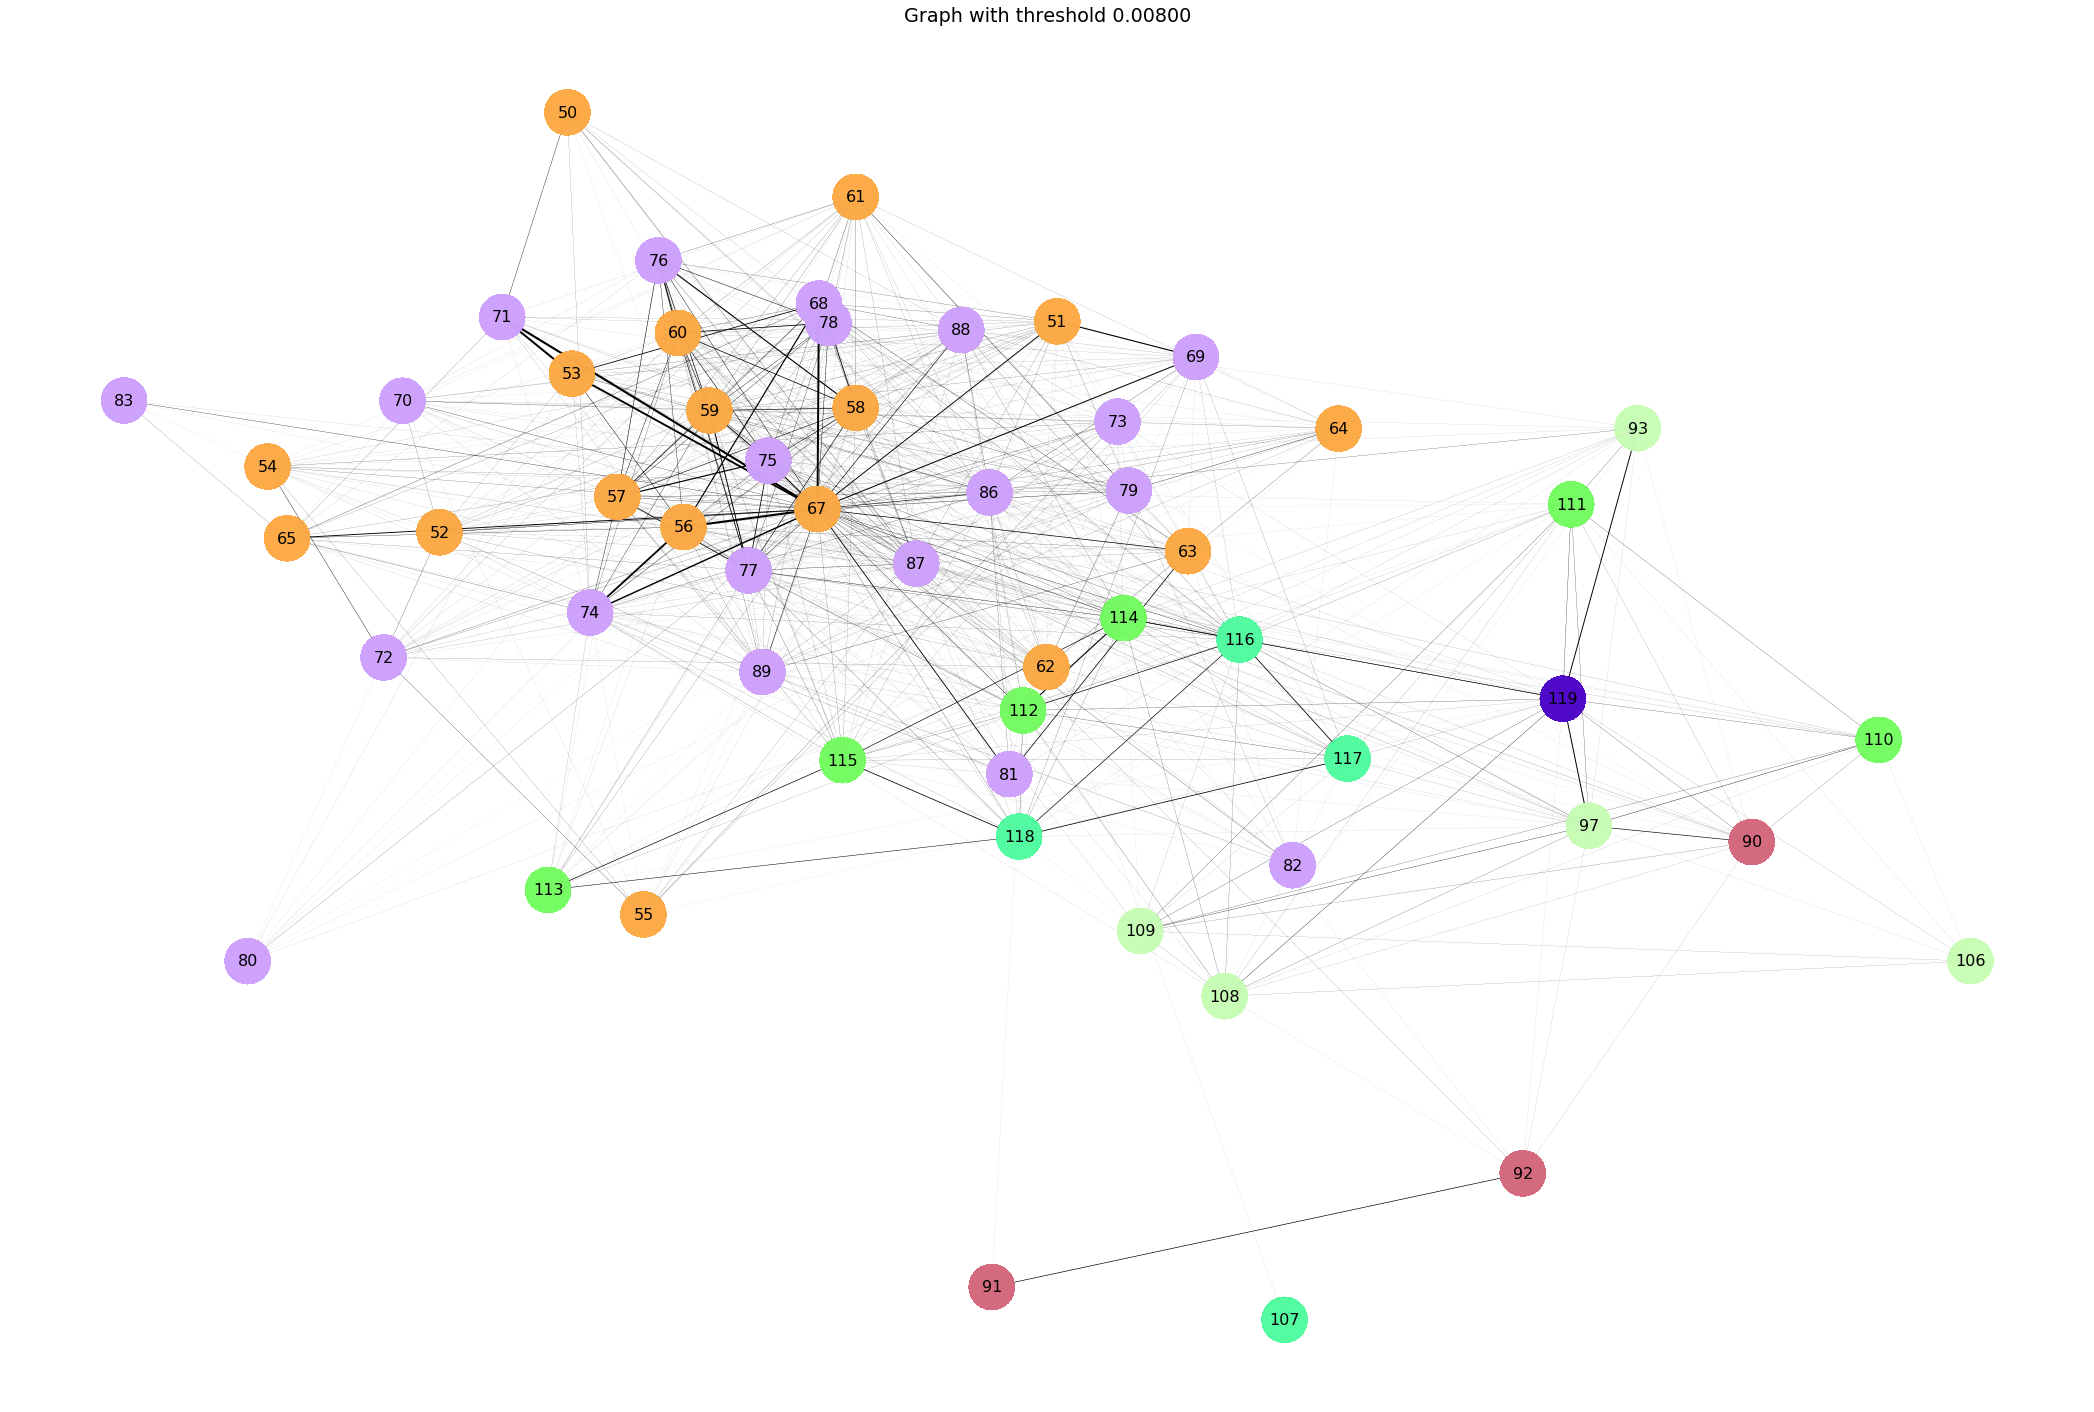

In [12]:
mi_graph.draw_graph(Gr, pos, weights, link_weight=2., fig_size = (30,20))

Here are the top 20 pairs of variables based on the mutual information between them. In the table you also find the p-value according to [G-test](https://en.wikipedia.org/wiki/G-test)

In [13]:
df = mi_graph.save_top_mi_values(E, topK=20)
df.head(20)

,node1,node1name,node2,node2name,mutual_info,p-value,sample_size
0,67,#barriers+food_Among those mentioned as reason...,71,#barriers+cash_I do not have documents to acce...,0.570677,0.0,374
1,56,#barriers+food_Services are not available?25,67,#barriers+food_Among those mentioned as reason...,0.561433,0.0,954
2,53,#barriers+food_I do not have documents to acce...,71,#barriers+cash_I do not have documents to acce...,0.540571,0.0,374
3,67,#barriers+food_Among those mentioned as reason...,68,#access+cash_Does your family receive any cash...,0.531209,0.0,954
4,53,#barriers+food_I do not have documents to acce...,67,#barriers+food_Among those mentioned as reason...,0.508244,0.0,954
5,56,#barriers+food_Services are not available?25,74,#barriers+cash_Services are not available?42,0.489562,0.0,374
6,67,#barriers+food_Among those mentioned as reason...,74,#barriers+cash_Services are not available?42,0.387520,0.0,374
7,56,#barriers+food_Services are not available?25,68,#access+cash_Does your family receive any cash...,0.328470,0.0,954
8,57,#barriers+food_Services are too expensive ?26,75,#barriers+cash_Services are too expensive ?43,0.319383,0.0,374
9,51,#barriers+food_I do not know where the service...,69,#barriers+cash_I do not know where the service...,0.307482,0.0,374


How can we identify very "important" variables ? One way of looking at it is through the lens of Graph Theory. If a variable is highly correlated with several variables, which in turn are correlated with others, this variable has a higher value "centrality" in the graph. Let's compute "eigenvector" centrality : this is based on the graph adjacency matrix's principal eigenvector.

In [14]:
C = mi_graph.compute_centrality(Gr, centrality_type='between')

the variable with the higest centrality is : 

In [15]:
print(' .... Variable name : %s , centrality %.3f ....' %(data.columns[C[0][0]], C[0][1]))

 .... Variable name : #barriers+food_Among those mentioned as reasons, what will be the most important issue which, if solved, will help you access services? Select one please36 , centrality 0.089 ....


# What about correlations between variables based only on people with disability ? 

In [16]:
# let's make a new graph!
data_disability = data.loc[data['#disability']==1, :]

In [17]:
data_disability.shape

(1140, 120)

In [18]:
# instantiate the graph builder object
mi_graph_disability = MIGraphBuilder(MI_type = 'IQR', na_remove = True, na_thresh = 200, MI_thresh = 0.02)
# compute edges
E_disability, _ = mi_graph_disability.compute_graph(data_disability, return_all=True)
# sub-select edges
E_disability = mi_graph_disability.select_nodes(select_group = ['#wgq', '#barriers+food', '#access+food', 
                                                                '#barriers+cash', '#access+cash', '#personal'], only_these=True)
# make networkX graph
Gr_disability, pos_disability, weights_disability = mi_graph_disability.setup_nx_graph(E_disability, graph_scale = 0.4)

 ..... MI graph computed in 6.94 secs ...... 
 ..... NX graph computed in 0.02 secs ...... 


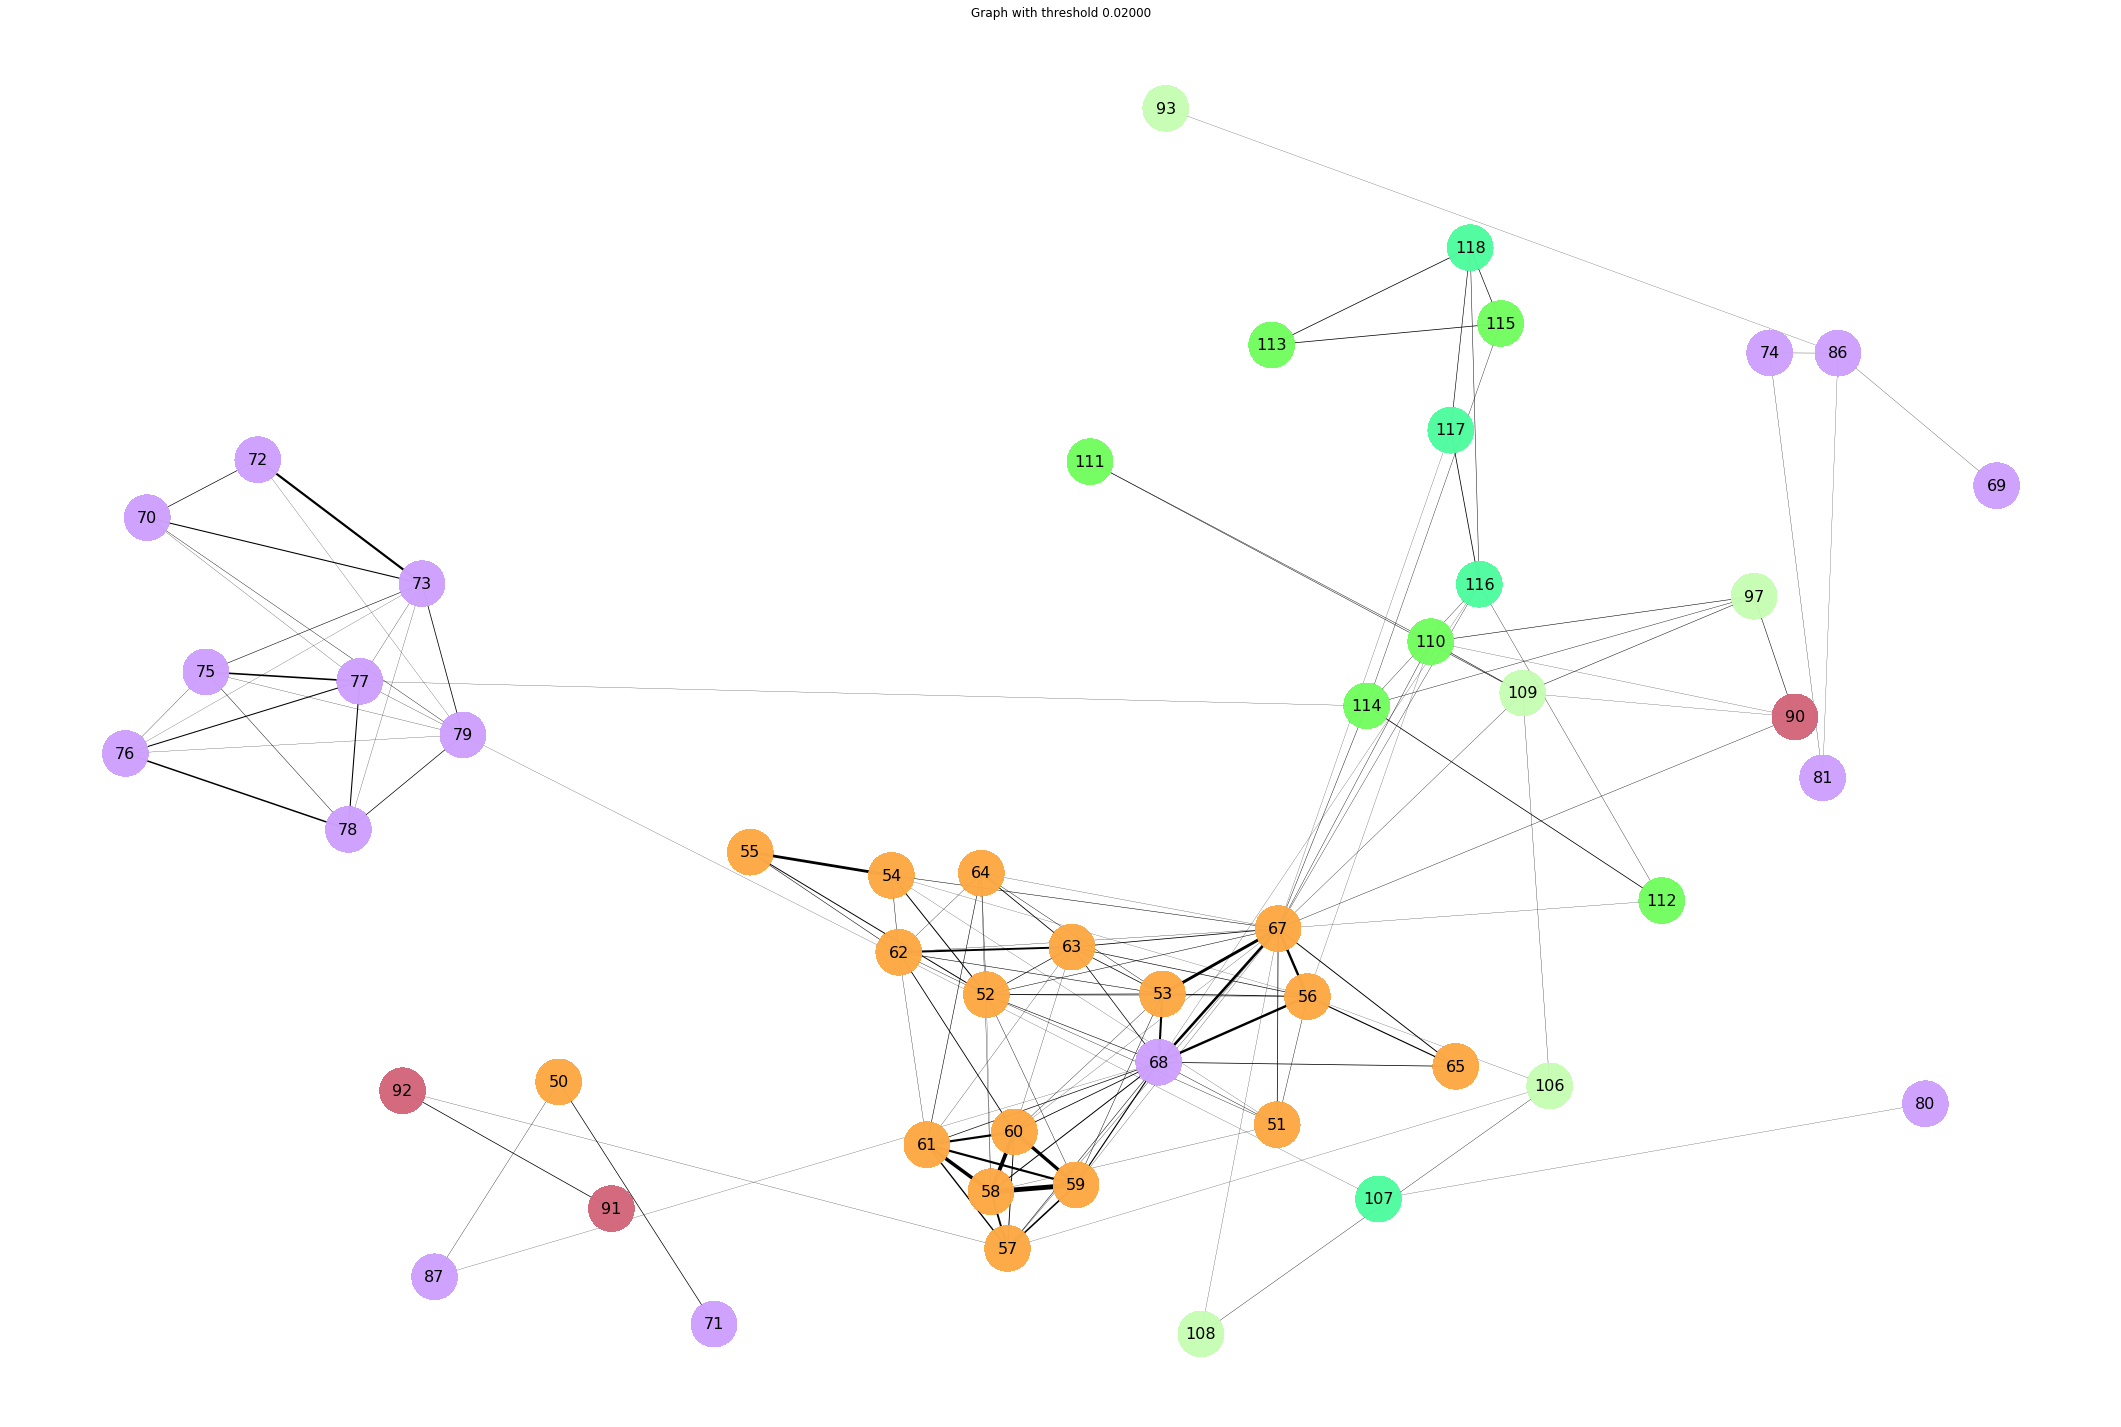

In [19]:
mi_graph_disability.draw_graph(Gr_disability, pos_disability, weights_disability, link_weight=2., fig_size = (30,20))

Here are the top 20 pairs of variables based on the mutual information between them

In [20]:
df = mi_graph_disability.save_top_mi_values(E_disability, topK=20)
df.head(20)

,node1,node1name,node2,node2name,mutual_info
0,58,#barriers+food_Services are far away and trans...,59,#barriers+food_Services are far away and trans...,0.486406
1,58,#barriers+food_Services are far away and trans...,60,#barriers+food_Services are far away and trans...,0.383348
2,58,#barriers+food_Services are far away and trans...,61,#barriers+food_Services are delivered in place...,0.349074
3,59,#barriers+food_Services are far away and trans...,60,#barriers+food_Services are far away and trans...,0.329437
4,53,#barriers+food_I do not have documents to acce...,67,#barriers+food_Among those mentioned as reason...,0.293384
5,54,#barriers+food_Safety fears for movement outsi...,55,#barriers+food_Safety fears for movement outsi...,0.276852
6,67,#barriers+food_Among those mentioned as reason...,68,#access+cash_Does your family receive any cash...,0.253620
7,56,#barriers+food_Services are not available?25,68,#access+cash_Does your family receive any cash...,0.241075
8,56,#barriers+food_Services are not available?25,67,#barriers+food_Among those mentioned as reason...,0.239712
9,72,#barriers+cash_Safety fears for movement outsi...,73,#barriers+cash_Safety fears for movement outsi...,0.220503


How can we identify very "important" variables ? One way of looking at it is through the lens of Graph Theory. If a variable is highly correlated with several variables, which in turn are correlated with others, this variable has a higher value "centrality" in the graph. Let's compute "eigenvector" centrality : this is based on the graph adjacency matrix's principal eigenvector.

In [21]:
C = mi_graph_disability.compute_centrality(Gr_disability, centrality_type='eigenvector')

the variable with the higest centrality is : 

In [22]:
print(' .... Variable name : %s , centrality %.3f ....' %(data_disability.columns[C[0][0]], C[0][1]))

 .... Variable name : #barriers+food_Services are far away and transportation is not available?27 , centrality 0.515 ....


# lets look at a graph that must include #disability as one of the nodes in each pair

We can re-use mi_graph because we only need to select a part of the graph!

In [19]:
# now lets sub-select a part of the graph. We have to set only_these to False becuase that will look for #disability in both nodes in a pair
E = mi_graph.select_nodes(select_group = ['#disability'], only_these=False)

How many nodes are there in this sub-graph ? 

In [20]:
len(E.keys())

103

In [26]:
Gr, pos, weights = mi_graph.setup_nx_graph(E, MI_thresh=0.005, graph_scale=0.5)

 ..... NX graph computed in 0.01 secs ...... 


now lets draw it !

 ..... NX graph plotted in 0.11 secs ..... 


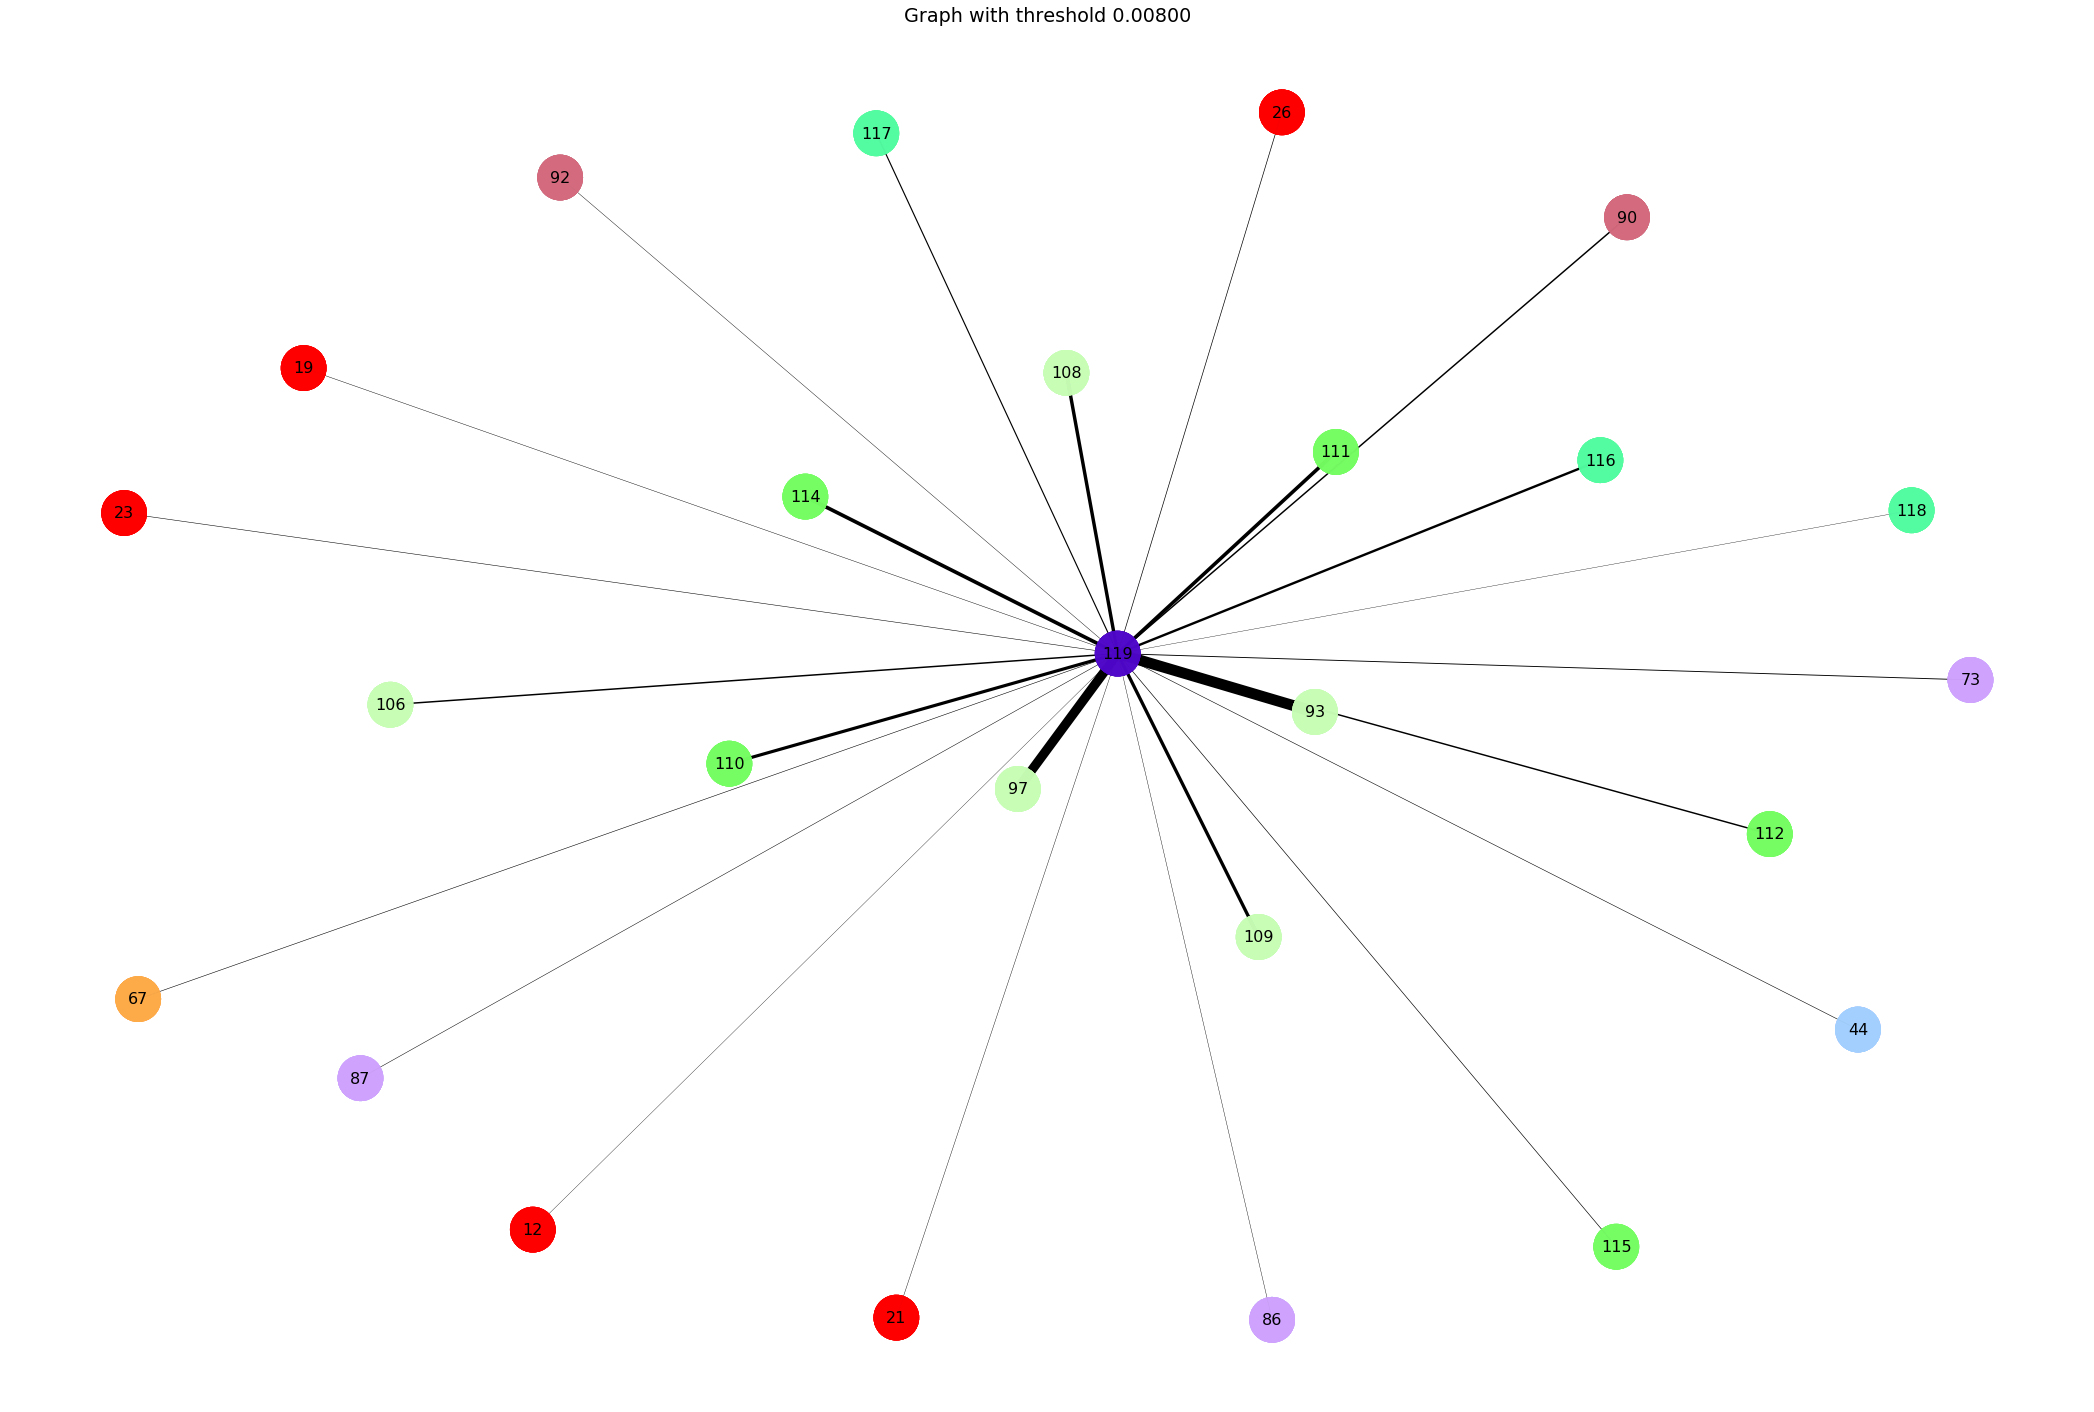

In [30]:
mi_graph.draw_graph(Gr, pos, weights, link_weight=2., fig_size = (30,20),
                    savepath ='')

In [31]:
df = mi_graph.save_top_mi_values(E, topK=20, savepath='/Users/gagan/Dropbox/Work/UNOCHA/code/HI_Jordan/Results/HI_adult_disability_only_correlations.csv')
df.head(20)

,node1,node1name,node2,node2name,mutual_info
0,93,"#wgq+ss_Do you have difficulty seeing, even wh...",119,#disability,0.170313
1,97,#wgq+ss_Do you have difficulty walking or clim...,119,#disability,0.145440
2,114,#wgq+en_How often do you feel depressed?,119,#disability,0.057466
3,111,#wgq+en_Do you have difficulty using your hand...,119,#disability,0.056287
4,108,#wgq+ss_Do you have difficulty remembering or ...,119,#disability,0.053552
5,109,"#wgq+ss_Do you have difficulty with self care,...",119,#disability,0.051306
6,110,#wgq+en_Do you have difficulty raising a 2 lit...,119,#disability,0.049450
7,116,"#wgq+es_In the past 3 months, how often did yo...",119,#disability,0.037593
8,106,"#wgq+ss_Using your usual language, do you have...",119,#disability,0.023320
9,90,#personal_Age,119,#disability,0.023165


# save the networkX Graph Gr and the edges 

In [32]:
mi_graph.save(Gr, '/Users/gagan/Dropbox/Work/UNOCHA/code/HI_Jordan/Results/HI_adult_mi_graph')